In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

df = pd.read_excel("Concrete_Data.xls")
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [2]:
X = df.copy()
y = X.drop(X.columns[[8]],axis =1)

# Train and score baseline model
baseline = RandomForestRegressor(criterion="absolute_error", random_state=0)
baseline_score = cross_val_score(
    baseline, X, y, cv=5, scoring="neg_mean_absolute_error"
)
baseline_score = -1 * baseline_score.mean()

print(f"MAE Baseline Score: {baseline_score:.4}")

MAE Baseline Score: 18.77


In [3]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 8 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 64.5 KB


In [4]:
for i in range(3):
    print(i,end="")

012

In [5]:
X["FCRatio"] = X["Fine Aggregate (component 7)(kg in a m^3 mixture)"] / X["Coarse Aggregate  (component 6)(kg in a m^3 mixture)"]
X["WCRatio"] = X["Water  (component 4)(kg in a m^3 mixture)"] / X["Cement (component 1)(kg in a m^3 mixture)"]
X["AggCmtRatio"] = (X["Coarse Aggregate  (component 6)(kg in a m^3 mixture)"] + X["Fine Aggregate (component 7)(kg in a m^3 mixture)"]) / X["Cement (component 1)(kg in a m^3 mixture)"]
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 12 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals) 

In [6]:
y = X.drop(X.columns[[8]],axis =1)

# Train and score baseline model
model = RandomForestRegressor(criterion="absolute_error", random_state=0)
score = cross_val_score(
    model, X, y, cv=5, scoring="neg_mean_absolute_error"
)
score = -1 * score.mean()

print(f"MAE Baseline Score: {baseline_score:.4}")

MAE Baseline Score: 18.77


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

#accidents = pd.read_csv("US_Accidents_Dec21_updated.csv")
autos = pd.read_csv("Automobile_data.csv")
concrete = pd.read_excel("Concrete_Data.xls")
customer = pd.read_csv("WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")


In [8]:
roadway_features = ["Amenity", "Bump", "Crossing", "GiveWay",
    "Junction", "NoExit", "Railway", "Roundabout", "Station", "Stop",
    "TrafficCalming", "TrafficSignal"]
accidents["RoadwayFeatures"] = accidents[roadway_features].sum(axis=1)

accidents[roadway_features + ["RoadwayFeatures"]].head(10)

In [11]:
customer["AverageIncome"] = (customer.groupby("State")["Income"].transform("mean"))
customer[["State", "Income", "AverageIncome"]].head(10)

,State,Income,AverageIncome
0,Washington,56274,38122.733083
1,Arizona,0,37405.402231
2,Nevada,48767,38369.605442
3,California,0,37558.946667
4,Washington,43836,38122.733083
5,Oregon,62902,37557.283353
6,Oregon,55350,37557.283353
7,Arizona,0,37405.402231
8,Oregon,14072,37557.283353
9,Oregon,28812,37557.283353


In [14]:
# Create splits
df_train = customer.sample(frac=0.5)
df_valid = customer.drop(df_train.index)
df_train

# Create the average claim amount by coverage type, on the training set
df_train["AverageClaim"] = df_train.groupby("Coverage")["Total Claim Amount"].transform("mean")

# Merge the values into the validation set
df_valid = df_valid.merge(
    df_train[["Coverage", "AverageClaim"]].drop_duplicates(),
    on="Coverage",
    how="left",
)

df_valid[["Coverage", "AverageClaim"]].head(10)


,Coverage,AverageClaim
0,Basic,377.733762
1,Basic,377.733762
2,Premium,653.522064
3,Basic,377.733762
4,Basic,377.733762
5,Basic,377.733762
6,Basic,377.733762
7,Basic,377.733762
8,Basic,377.733762
9,Extended,477.727252


In [26]:
df = pd.read_csv("housing.csv")
df
X = df.loc[:, ["median_income", "latitude", "longitude"]]
X.head()


,median_income,latitude,longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [29]:
# Create cluster feature
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head(20)

,median_income,latitude,longitude,MedHouseVal,Cluster
0,8.3252,37.88,-122.23,452600.0,3
1,8.3014,37.86,-122.22,358500.0,1
2,7.2574,37.85,-122.24,352100.0,1
3,5.6431,37.85,-122.25,341300.0,1
4,3.8462,37.85,-122.25,342200.0,1
5,4.0368,37.85,-122.25,269700.0,5
6,3.6591,37.84,-122.25,299200.0,5
7,3.1200,37.84,-122.25,241400.0,5
8,2.0804,37.84,-122.26,226700.0,4
9,3.6912,37.84,-122.25,261100.0,5


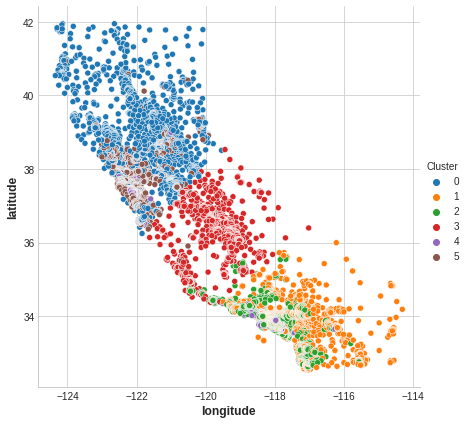

In [23]:
sns.relplot(
    x="longitude", y="latitude", hue="Cluster", data=X, height=6,
);

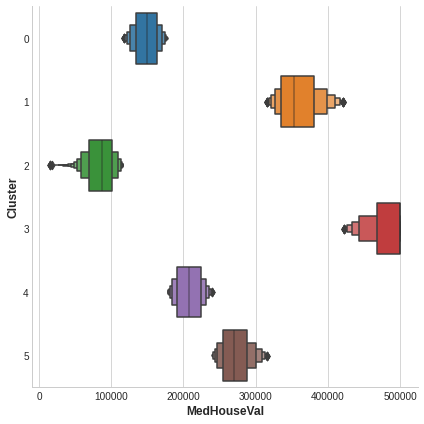

In [32]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
X["MedHouseVal"] = df["median_house_value"]
sns.catplot(x="MedHouseVal", y="Cluster", data=X, kind="boxen", height=6);